
# Problems

In [1]:
 # Dates & Times. https://atlantictu-my.sharepoint.com/personal/ian_mcloughlin_atu_ie/_layouts/15/stream.aspx?id=%2Fpersonal%2Fian%5Fmcloughlin%5Fatu%5Fie%2FDocuments%2Fstudent%5Fshares%2Fcomputer%2Dinfrastructure%2F22%2Ddatetime%2Emkv&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview%2Eca70c99c%2D5d51%2D4c6a%2D8743%2D670d34da45a7
import datetime as dt

 # Data frames
import pandas as pd

# Yahoo finance data.
import yfinance as yf

# Plotting
import matplotlib.pyplot as plt

# Folder creation + listing files
import os


## Problem 1: Data from yfinance

Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:
Facebook (META)  
Apple (AAPL)  
Amazon (AMZN)  
Netflix (NFLX)  
Google (GOOG)  

The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.

https://github.com/ranaroussi/yfinance


In [2]:
# https://ranaroussi.github.io/yfinance/
#tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

sTEP 1:
Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

In [3]:
 # Set up the function 'get_data()' that can be called for hourly prices of FAANG stocks over the last 5 days
def get_data(): 
    df = yf.download("META AAPL AMZN NFLX GOOG", period="5d",interval="1h")
    return df

# References:
# Python functions - https://www.w3schools.com/python/python_functions.asp
# Yfinance Download -  https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html

 # Call the function
df = get_data()

/tmp/ipykernel_41898/1561000877.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("META AAPL AMZN NFLX GOOG", period="5d",interval="1h")
[*********************100%***********************]  5 of 5 completed


In [4]:
# can remove
type(df)

pandas.core.frame.DataFrame

In [5]:
# can remove
df.head

<bound method NDFrame.head of Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-21 14:30:00+00:00  269.850006  216.264999  296.760010  585.119995   
2025-11-21 15:30:00+00:00  270.899994  218.574997  300.329987  587.742676   
2025-11-21 16:30:00+00:00  270.549988  219.639999  296.489990  592.979980   
2025-11-21 17:30:00+00:00  270.980011  218.722000  297.290009  591.625000   
2025-11-21 18:30:00+00:00  272.609985  222.050003  302.660095  597.548584   
2025-11-21 19:30:00+00:00  271.369995  220.184998  299.945007  594.070007   
2025-11-21 20:30:00+00:00  271.489990  220.645004  299.660004  594.469971   
2025-11-24 14:30:00+00:00  273.095001  225.869995  316.879486  611.349976   
2025-11-24 15:30:00+00:00  275.000000  224.949005  314.480011  611.652893   
2025-11-24 16:30:00+00:00  274.850006  224.619

step 3 :
save the file down in CSV format using the naming convention
format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds.



In [6]:

# https://atlantictu-my.sharepoint.com/personal/ian_mcloughlin_atu_ie/_layouts/15/stream.aspx?id=%2Fpersonal%2Fian%5Fmcloughlin%5Fatu%5Fie%2FDocuments%2Fstudent%5Fshares%2Fcomputer%2Dinfrastructure%2F21%2Dsaving%2Ddata%2Emkv&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview%2E4010ac0b%2D5f2f%2D49bd%2Da4c3%2Daff9bc770d09



# Show current date & time                                        #Ref. - https://docs.python.org/3/library/datetime.html
now = dt.datetime.now()

#Show date & time
now

#Format date & time for current date & time above as a string -  'now' 
now.strftime("%Y%m%d-%H:%M:%S")             # Ref. format codes - https://docs.python.org/3/library/datetime.html#format-codes

'20251129-21:05:37'

In [7]:
# Create folder called 'Data'                  https://www.geeksforgeeks.org/python/python-os-makedirs-method/
os.makedirs('./Data', exist_ok=True)           # exist_ok=True - means when code re-ran no handling error will appear as folder exists - add as markdown cell


# File Name - Save to data folder # cOMMENT oCT 19TH - nEED TO ADD LOCATION OF folder where file will save
filename = "Data/" + now.strftime("%Y%m%d-%H:%M:%S")+ ".csv"



In [8]:
# Save timestamped csv to Data folder
df.to_csv(filename)




## Problem 2: Plotting Data

Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html



In [9]:
#Call plot

#df.plot()
# Check columns so we can see what we are working with & columns required
df.columns




MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

In [10]:
#Closing prices for 5 stocks - put as variable so can easily amend single line if future stocks added
#closing_Prices = df['Close']

# Plot the closing prices
#closing_Prices.plot()





# Save plot to file (Lecture 29-30) Lecture 31 to follow - matching csv file to plot

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html


Markdown comments expand on
doc for savefig , explain how it is used
Explain each line itesm of code in markdown cell in more info



In [11]:
# Save plot to file (Lecture 29-31)

#Creat new figure and axis
#fig, ax = plt.subplots()

# Plot closing prices
#closing_Prices.plot(ax=ax)

# Show current date & time                                        #Ref. - https://docs.python.org/3/library/datetime.html
#now = dt.datetime.now()

# File Name
#filename = "./Plots/" + now.strftime("%Y%m%d-%H:%M:%S")+ ".png"

# Create folder called 'Plots'                  https://www.geeksforgeeks.org/python/python-os-makedirs-method/
#os.makedirs('./Plots', exist_ok=True)           # exist_ok=True - means when code re-ran no handling error will appear as folder exists - add as markdown cell

# Save figure in Plots folder
#fig.savefig(filename, dpi=300)    # dpi ref = https://stackoverflow.com/questions/39870642/how-to-plot-a-high-resolution-graph

<Axes: xlabel='Datetime'>

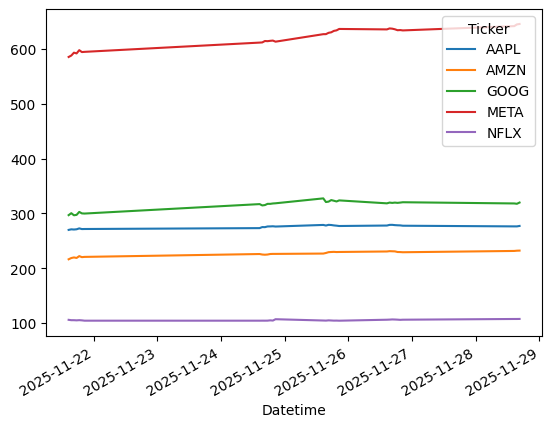

In [12]:
# Problem 2 - Update from Lecture 33 - Read latest file from Data folder and plot closing prices 

# Set up the function 'plot_data()' that opens latest date file in the data folder and plots closing prices
def plot_data(): 
    df = pd.read_csv(f'Data/{data_files[0]}',header=[0,1],index_col=0,parse_dates=True) # lecture 33 - 

#Closing prices for 5 stocks - put as variable so can easily amend single line if future stocks added
closing_Prices = df['Close']

# Plot the closing prices
closing_Prices.plot()



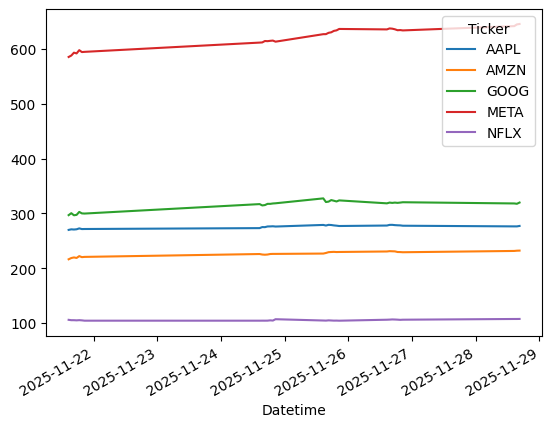

In [13]:
# Save plot to file (Lecture 29-31)

#Creat new figure and axis
fig, ax = plt.subplots()

# Plot closing prices
closing_Prices.plot(ax=ax)

# Show current date & time                                        #Ref. - https://docs.python.org/3/library/datetime.html
now = dt.datetime.now()

# File Name
filename = "./Plots/" + now.strftime("%Y%m%d-%H:%M:%S")+ ".png"

# Create folder called 'Plots'                  https://www.geeksforgeeks.org/python/python-os-makedirs-method/
os.makedirs('./Plots', exist_ok=True)           # exist_ok=True - means when code re-ran no handling error will appear as folder exists - add as markdown cell

# Save figure in Plots folder
fig.savefig(filename, dpi=300)    # dpi ref = https://stackoverflow.com/questions/39870642/how-to-plot-a-high-resolution-graph


File Listings - Lecture 31

https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
https://docs.python.org/3/library/os.html#os.listdir

In [14]:
# List the files in the Data Folder
data_files = os.listdir('./Data/')

#Show
data_files




['20251129-21:05:37.csv',
 '20251129-20:23:03.csv',
 '20251122-14:30:06.csv',
 '20251122-14:29:45.csv',
 '20251129-11:17:53.csv',
 '20251122-14:29:20.csv',
 '20251129-14:00:37.csv',
 '20251129-20:30:12.csv',
 '20251129-19:42:10.csv',
 '20251129-20:37:40.csv',
 '20251122-13:25:33.csv']

In [15]:
# Sort the list of data files           # https://docs.python.org/3/howto/sorting.html
data_files.sort(reverse=True)

#Show
#data_files

#Latest file
data_files[0]


'20251129-21:05:37.csv'

## Problem 3: Script

Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook

Added a shebang line
#! /usr/bin/env python  

so that we could run the python code without stating python prior to running  **NOTE 15th Nov: Add comparison table of before and after this step**
faang.py was not exucatable so we used chmod u+x faang.py to allow the file to be executed, previously was read only access
ls -l to check if file execuatbele or just rw
be creful that we instruct on command line to look to current folder as does not auto pick up ./faang.py as an example

In [16]:
# lecture 33 - can delete as not necesarily required but better for reading file in csv
df = pd.read_csv(f'Data/{data_files[0]}',header=[0,1],index_col=0,parse_dates=True)
#Show df
df

# mULTICOLUMN INDEX back from yfinance, currently only using 1st row
# Remove multi index - ref. https://stackoverflow.com/questions/20208320/how-to-remove-multiindex-in-pandas-dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

# header infer means firs

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-21 14:30:00+00:00  269.850006  216.264999  296.760010  585.119995   
2025-11-21 15:30:00+00:00  270.899994  218.574997  300.329987  587.742676   
2025-11-21 16:30:00+00:00  270.549988  219.639999  296.489990  592.979980   
2025-11-21 17:30:00+00:00  270.980011  218.722000  297.290009  591.625000   
2025-11-21 18:30:00+00:00  272.609985  222.050003  302.660095  597.548584   
2025-11-21 19:30:00+00:00  271.369995  220.184998  299.945007  594.070007   
2025-11-21 20:30:00+00:00  271.489990  220.645004  299.660004  594.469971   
2025-11-24 14:30:00+00:00  273.095001  225.869995  316.879486  611.349976   
2025-11-24 15:30:00+00:00  275.000000  224.949005  314.480011  611.652893   
2025-11-24 16:30:00+00:00  274.850006  224.619995  315.119995  614.239990   
2025-11-24 17:30:00+00:00  276.119995  224.970001  317.369995  613.940002   
2025-11-24 18:30:00+00:00  276.219513  225.910004  317.341187  614.580017   
2025-11-24 19:30:00+00:00  276.475006  226.099304  318.040009  615.005005   
2025-11-24 20:30:00+00:00  275.980011  226.100006  318.369995  613.034973   
2025-11-25 14:30:00+00:00  278.904999  226.710007  327.320007  626.695007   
2025-11-25 15:30:00+00:00  277.829987  227.770004  320.679993  626.760010   
2025-11-25 16:30:00+00:00  279.070099  229.250000  321.404999  629.164978   
2025-11-25 17:30:00+00:00  278.760010  229.559998  324.230011  630.104980   
2025-11-25 18:30:00+00:00  278.035004  229.800003  323.007996  632.690002   
2025-11-25 19:30:00+00:00  277.565002  229.490005  321.700104  633.650024   
2025-11-25 20:30:00+00:00  276.950012  229.600006  323.649994  636.219971   
2025-11-26 14:30:00+00:00  277.809998  230.514999  318.279999  635.400024   
2025-11-26 15:30:00+00:00  279.010101  231.084106  319.635010  637.190002   
2025-11-26 16:30:00+00:00  279.079010  230.880005  319.089996  636.739990   
2025-11-26 17:30:00+00:00  278.549988  230.710007  319.630005  635.599976   
2025-11-26 18:30:00+00:00  278.260010  229.565002  319.149994  633.900024   
2025-11-26 19:30:00+00:00  278.079987  229.429993  319.652008  634.205017   
2025-11-26 20:30:00+00:00  277.470001  229.119995  320.279999  633.549988   
2025-11-28 14:30:00+00:00  276.260010  231.479996  318.079987  641.385010   
2025-11-28 15:30:00+00:00  276.250000  231.940002  317.470001  644.494995   
2025-11-28 16:30:00+00:00  277.049988  232.104507  319.720001  645.299988   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-11-21 14:30:00+00:00  105.889999  270.450012  217.910004  301.920013   
2025-11-21 15:30:00+00:00  105.239998  271.470001  218.610001  301.829987   
2025-11-21 16:30:00+00:00  105.220001  271.119995  220.723007  300.375000   
2025-11-21 17:30:00+00:00  104.945000  271.600006  220.085007  298.179993   
2025-11-21 18:30:00+00:00  105.286003  273.315002  222.100006  303.959991   
2025-11-21 19:30:00+00:00  104.925003  273.279999  222.201996  302.920013   
2025-11-21 20:30:00+00:00  104.349998  272.130005  221.320007  301.440002   
2025-11-24 14:30:00+00:00  104.334999  275.920013  226.789993  318.549988   
2025-11-24 15:30:00+00:00  104.385002  275.389587  226.414993  317.750000   
2025-11-24 16:30:00+00:00  104.359901  275.269989  225.119995  315.174988   
2025-11-24 17:30:00+00:00  104.410004  276.510010  225.589996  318.149994   
2025-11-24 18:30:00+00:00  104.930000  276.450012  226.039993  318.379913   
2025-11-24 19:30:00+00:00  104.570000  276.654999  226.865005  319.000000   
2025-11-24 20:30:00+00:00  107.010002  276.980011  227.270004  319.799988   
2025-11-25 14:30:00+00:00  104.644997  280.380005  227.899994  328.67001

In [17]:
#Lecture 33 - look at row index
df.index

DatetimeIndex(['2025-11-21 14:30:00+00:00', '2025-11-21 15:30:00+00:00',
               '2025-11-21 16:30:00+00:00', '2025-11-21 17:30:00+00:00',
               '2025-11-21 18:30:00+00:00', '2025-11-21 19:30:00+00:00',
               '2025-11-21 20:30:00+00:00', '2025-11-24 14:30:00+00:00',
               '2025-11-24 15:30:00+00:00', '2025-11-24 16:30:00+00:00',
               '2025-11-24 17:30:00+00:00', '2025-11-24 18:30:00+00:00',
               '2025-11-24 19:30:00+00:00', '2025-11-24 20:30:00+00:00',
               '2025-11-25 14:30:00+00:00', '2025-11-25 15:30:00+00:00',
               '2025-11-25 16:30:00+00:00', '2025-11-25 17:30:00+00:00',
               '2025-11-25 18:30:00+00:00', '2025-11-25 19:30:00+00:00',
               '2025-11-25 20:30:00+00:00', '2025-11-26 14:30:00+00:00',
               '2025-11-26 15:30:00+00:00', '2025-11-26 16:30:00+00:00',
               '2025-11-26 17:30:00+00:00', '2025-11-26 18:30:00+00:00',
               '2025-11-26 19:30:00+00:00', '2025-1

## Problem 4: Automation

Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

Lecture 34 - 

To automate the execution of the script, we need to set up GitHub Actions by creating:

1. A directory named .github/workflows/  
2. A workflow file inside the directory called faang.yml

Background Information:

**GitHub Actions** is a CI/CD (Continuous Integration and Continuous Delivery) system that lets you automate tasks such as building, testing, and running scripts. Workflows run automatically in response to events—like pushing code to the repository—or on a defined schedule, for example,  as in this case running the FAANG code every Saturday morning.  
**Reference**: GitHub Actions Docs – https://docs.github.com/en/actions

More information can be found in the GitHub Actions quickstart guide:
https://docs.github.com/en/actions/get-started/quickstart

**YML or YAML** -  YAML stands for YAML Ain't Markup Language, but it originally stood for Yet Another Markup Language - is human readable data serialization language that is similar to JSON and XML files.Serialization is a process where one application or service that has different data structures and is written in a different set of technologies can transfer data to another application using a standard format.
Serialization is about translating, converting, and wrapping up a data structure in another format.
The data in the new format can be stored in a file or transmitted to another application or service over a network.
YAML is a widely used format for writing configuration files for different DevOps tools, programs, and applications because of its human-readable and intuitive syntax.  
**Reference**: Freecodecamp - what is YAML – https://www.freecodecamp.org/news/what-is-yaml-the-yml-file-format/


Steps:



Once the workflow file is created, we add the required YAML configuration code into faang.yml.




 ## End